In [1]:
import pandas as pd
import numpy as np

## DSD Computation

In [2]:
! ls outputs/node2vec/

fission_yeast_biogrid_d_100_p_1_q_1_nw_10
logs
mouse_12000_biogrid_d_100_p_1_q_1_nw_10


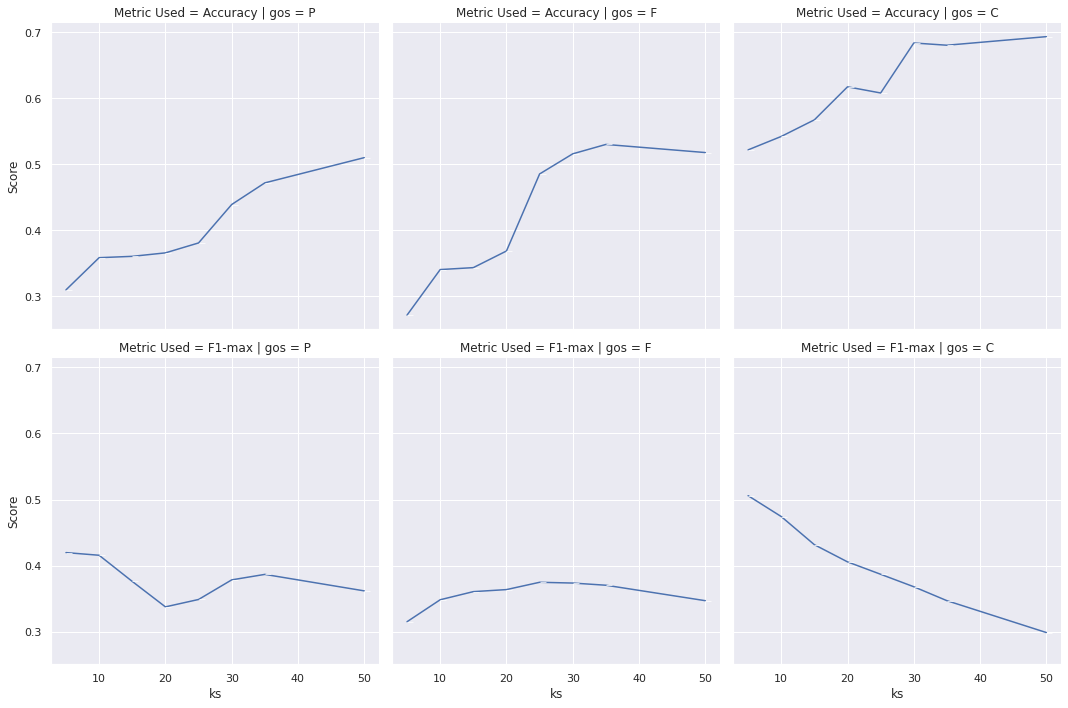

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

kdsd = [5, 10, 15, 20, 25, 30, 35, 50]
def generate_dsd_table_results(kvals, gos, folder):
    """
    Generating DSD results for different kvals
    """
    results = {"gos": [],
              "ks": [],
              "Score": [],
              "Metric Used": [],
              "std": []}
    for g in gos:
        for k in kvals:
            df = pd.read_csv(f"{folder}/{g}_k_{k}.tsv", sep = "\t")
            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("Accuracy")
            results["Score"].append(df["acc"].mean())
            results["std"].append(df["acc"].std())            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("F1-max")
            results["Score"].append(df["f1"].mean())
            results["std"].append(df["f1"].std())
    df = pd.DataFrame(results)
    return df
dsd_df = generate_dsd_table_results(kdsd, ["P", "F", "C"], "outputs/new_data/all_outputs_folder/dsd/fission_yeast_biogrid/")
p = sns.relplot(data = dsd_df, x="ks", y = "Score", row="Metric Used", col="gos", kind = "line", marker = True)
# SAVE the figure
# p.savefig("outputs/dsd/fission_yeast_biogrid/variation_with_k.png")

## Finding the MAX terms
### DSD

In [4]:
max_map = {"org": [], "method": [], "go": [], "metric": [], "best": []}
# DSD
for org in ["fission_yeast_biogrid", "mouse_12000_biogrid"]:
    dsd_org = generate_dsd_table_results(kdsd, ["P", "F", "C"], f"outputs/dsd/{org}/")
    res = dsd_org.groupby(["Metric Used", "gos"]).agg("max")
    for i, r in res.iterrows():
        max_map["org"].append(org)
        max_map["metric"].append(i[0])
        max_map["go"].append(i[1])
        max_map["best"].append(r["Score"])
        max_map["method"].append("dsd")

max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd'],
 'go': ['C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P'],
 'metric': ['Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max',
  'Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max'],
 'best': [0.6932203389830509,
  0.5299849501313675,
  0.5099977720842153,
  0.5058166230784495,
  0.37465687936906866,
  0.41960878464474344,
  0.658135897240672,
  0.4070404172099087,
  0.34250077202670626,
  0.46869181311236174,
  0.3391035156844055,
  0.2391417495826674]}

### MASHUP

In [5]:
for org in ["fission_yeast_biogrid.mashup.dim_1000", "mouse_12000_biogrid.mashup.dim_1000"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/mashup/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("mashup")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup'],
 'go': ['C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'F',
  'F',
 

### NODE2VEC

In [6]:
for org in ["fission_yeast_biogrid_d_100_p_1_q_1_nw_10", "mouse_12000_biogrid_d_100_p_1_q_1_nw_10"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/node2vec/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("node2vec")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map
df_mmap = pd.DataFrame(max_map)
df_mmap

,org,method,go,metric,best
0,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
1,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
2,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
3,fission_yeast_biogrid,dsd,C,F1-max,0.505817
4,fission_yeast_biogrid,dsd,F,F1-max,0.374657
5,fission_yeast_biogrid,dsd,P,F1-max,0.419609
6,mouse_12000_biogrid,dsd,C,Accuracy,0.658136
7,mouse_12000_biogrid,dsd,F,Accuracy,0.407040
8,mouse_12000_biogrid,dsd,P,Accuracy,0.342501
9,mouse_12000_biogrid,dsd,C,F1-max,0.468692


In [7]:
df_mmap["id"] = df_mmap["org"] + "-" + df_mmap["method"] + "-" + df_mmap["go"] + "-" + df_mmap["metric"]
df_mmap       = df_mmap.set_index("id")


In [8]:
df_mmap

,org,method,go,metric,best
id,,,,,
fission_yeast_biogrid-dsd-C-Accuracy,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
fission_yeast_biogrid-dsd-F-Accuracy,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
fission_yeast_biogrid-dsd-P-Accuracy,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
fission_yeast_biogrid-dsd-C-F1-max,fission_yeast_biogrid,dsd,C,F1-max,0.505817
fission_yeast_biogrid-dsd-F-F1-max,fission_yeast_biogrid,dsd,F,F1-max,0.374657
fission_yeast_biogrid-dsd-P-F1-max,fission_yeast_biogrid,dsd,P,F1-max,0.419609
mouse_12000_biogrid-dsd-C-Accuracy,mouse_12000_biogrid,dsd,C,Accuracy,0.658136
mouse_12000_biogrid-dsd-F-Accuracy,mouse_12000_biogrid,dsd,F,Accuracy,0.407040
mouse_12000_biogrid-dsd-P-Accuracy,mouse_12000_biogrid,dsd,P,Accuracy,0.342501


In [12]:
ks = [5, 15,25,35]
alphas = ["0.0", "0.1", "0.4", "0.8", "1.0"]
munk_dim=[20,30,50, 70, 100]
falphas = [float(a) for a in alphas]

def generate_table_results(kvals, munk_dim, alphas, gos, folder, align_type):
    """
    Generating the table from alphas and kvals
    """
    results = {"gos": [], 
               "ks": [], 
               "alphas": [], 
               "Metric Used": [], 
               "Score": [], 
               "mks": [],
               "align_type": [],
               "munk_dim": [],
               "std": []}
    for go in gos:
        print(f"\tGO: {go}")
        for k in ks:
            print(f"\t\t K: {k}")
            for a in alphas:
                for mdim in munk_dim:
                    for score in ["Accuracy", "F1-max"]:
                        results["Metric Used"].append(score)
                        results["gos"].append(go)
                        results["ks"].append(k)
                        results["mks"].append(15)
                        results["alphas"].append(float(a))
                        results["align_type"].append(align_type)
                        results["munk_dim"].append(mdim)
                        df = pd.read_csv(f"{folder}/{go}_k_{k}_alpha_{a}_landmark_{mdim}.tsv", sep = "\t")
                        if score == "Accuracy":
                            results["Score"].append(df["acc"].mean())
                            results["std"].append(df["acc"].std())
                        elif score == "F1-max":
                            results["Score"].append(df["f1"].mean())
                            results["std"].append(df["f1"].std())
    df = pd.DataFrame(results)
    return df

### UNIMUNDO - FISSION-BAKERS

In [13]:
df_hm = generate_table_results(ks, 
                               munk_dim,
                               alphas, 
                               ["P", "F", "C"], 
                               "outputs/unimundo/blast:bakers_yeast_biogrid-fission_yeast_biogrid",
                              "blast")
df_hm

	GO: P
		 K: 5
		 K: 15
		 K: 25
		 K: 35
	GO: F
		 K: 5
		 K: 15
		 K: 25
		 K: 35
	GO: C
		 K: 5
		 K: 15
		 K: 25
		 K: 35


,gos,ks,alphas,Metric Used,Score,mks,align_type,munk_dim,std
0,P,5,0.0,Accuracy,0.194012,15,blast,20,0.024842
1,P,5,0.0,F1-max,0.305487,15,blast,20,0.012901
2,P,5,0.0,Accuracy,0.182477,15,blast,30,0.022805
3,P,5,0.0,F1-max,0.332494,15,blast,30,0.020441
4,P,5,0.0,Accuracy,0.198351,15,blast,50,0.027649
...,...,...,...,...,...,...,...,...,...
595,C,35,1.0,F1-max,0.267310,15,blast,50,0.009693
596,C,35,1.0,Accuracy,0.670339,15,blast,70,0.014834
597,C,35,1.0,F1-max,0.277103,15,blast,70,0.006530
598,C,35,1.0,Accuracy,0.674294,15,blast,100,0.019510


In [53]:
df_hmb = generate_table_results(ks, 
                               munk_dim,
                               alphas, 
                               ["P", "F", "C"], 
                               "outputs/new_data/all_outputs_folder/unimundo_v_1/human_12000_biogrid-mouse_12000_biogrid/hubalign_blast",
                              "hubalign_blast")
df_hmb
df_hm = pd.concat([df_hm, df_hmb])
df_hm

	GO: P
		 K: 10
		 K: 20
		 K: 30
		 K: 50
	GO: F
		 K: 10
		 K: 20
		 K: 30
		 K: 50
	GO: C
		 K: 10
		 K: 20
		 K: 30
		 K: 50


,gos,ks,alphas,Metric Used,Score,mks,align_type,munk_dim,std
0,P,10,0.0,Accuracy,0.317763,15,hubalign,20,0.020132
1,P,10,0.0,F1-max,0.205438,15,hubalign,20,0.005955
2,P,10,0.0,Accuracy,0.310112,15,hubalign,50,0.005590
3,P,10,0.0,F1-max,0.207929,15,hubalign,50,0.005134
4,P,10,0.0,Accuracy,0.314296,15,hubalign,100,0.015899
...,...,...,...,...,...,...,...,...,...
1003,C,50,1.0,F1-max,0.141223,15,hubalign_blast,200,0.002782
1004,C,50,1.0,Accuracy,0.627299,15,hubalign_blast,250,0.017125
1005,C,50,1.0,F1-max,0.143967,15,hubalign_blast,250,0.002804
1006,C,50,1.0,Accuracy,0.628646,15,hubalign_blast,300,0.010349


In [89]:
df_c = df_hm.groupby(["gos", "ks", "munk_dim", "gos", "Metric Used", "align_type"]).aggregate("max")

In [ ]:
df_c = df_hm.loc[df_hm["munk_dim"] == 150, :]
df_c = df_c.drop(["munk_dim"], axis = 1)
df_c = df_c.reset_index()

0.35069845350436 0.658135897240672 0.47702235767806195
0.2182529335071708 0.4070404172099087 0.2161668839634941
0.1929677036870674 0.34250077202670626 0.19225364091097497
0.3295925331603685 0.46869181311236174 0.35321491806392
0.23227286953561901 0.3391035156844055 0.2405696374900248
0.1940720700167363 0.2391417495826674 0.19745511157637013


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

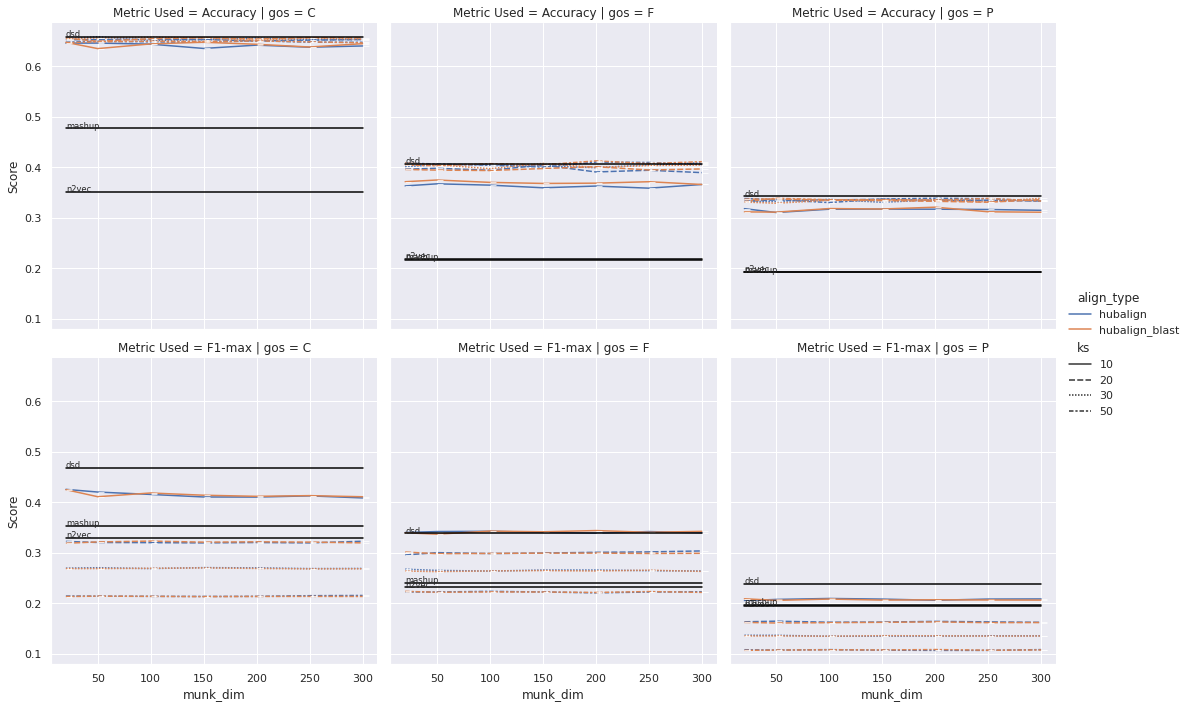

In [99]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_c, x= "munk_dim", y="Score", col="gos", row="Metric Used",
                style = "ks", hue = "align_type", kind = "line", marker = True, ci = "max")
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["C", "F", "P"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec, dsd, mashup)
        p.axes[i, j].plot(munk_dim, n2vec * np.ones((len(munk_dim))), color = "black")
        p.axes[i, j].annotate("n2vec", xycoords = "data", xy=(50,n2vec), xytext=(20,n2vec), fontsize = "x-small")
        p.axes[i, j].plot(munk_dim, dsd * np.ones((len(munk_dim))), color = "black")
        p.axes[i, j].annotate("dsd", xycoords = "data", xy=(50,dsd), xytext=(20,dsd), fontsize = "x-small")
        p.axes[i, j].plot(munk_dim, mashup * np.ones((len(munk_dim))), color = "black")
        p.axes[i, j].annotate("mashup", xycoords = "data",xy=(50,mashup), xytext=(20,mashup), fontsize = "x-small")
        
p.savefig("outputs/figs/mouse-human_variation_landmarks.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""


### UNIMUNDO - BAKERS-YEAST & HUMAN

In [105]:
df_bh = generate_table_results(ks, 
                               munk_dim,
                               alphas, 
                               ["P", "F", "C"], 
                               "outputs/new_data/all_outputs_folder/unimundo_v_1/bakers_yeast_biogrid-human_12000_biogrid/hubalign",
                              "hubalign")
df_bh
df_bhb = generate_table_results(ks, 
                               munk_dim,
                               alphas, 
                               ["P", "F", "C"], 
                               "outputs/new_data/all_outputs_folder/unimundo_v_1/bakers_yeast_biogrid-human_12000_biogrid/hubalign_blast",
                              "hubalign_blast")
df_bhb
df_bh = pd.concat([df_bh, df_bhb])
df_bh = df_bh.reset_index(drop=True)

	GO: P
		 K: 10
		 K: 20
		 K: 30
		 K: 50
	GO: F
		 K: 10
		 K: 20
		 K: 30
		 K: 50
	GO: C
		 K: 10
		 K: 20
		 K: 30
		 K: 50
	GO: P
		 K: 10
		 K: 20
		 K: 30
		 K: 50
	GO: F
		 K: 10
		 K: 20
		 K: 30
		 K: 50
	GO: C
		 K: 10
		 K: 20
		 K: 30
		 K: 50


In [107]:
df_c = df_c = df_hm.groupby(["gos", "ks", "munk_dim", "gos", "Metric Used", "align_type"]).aggregate("max")

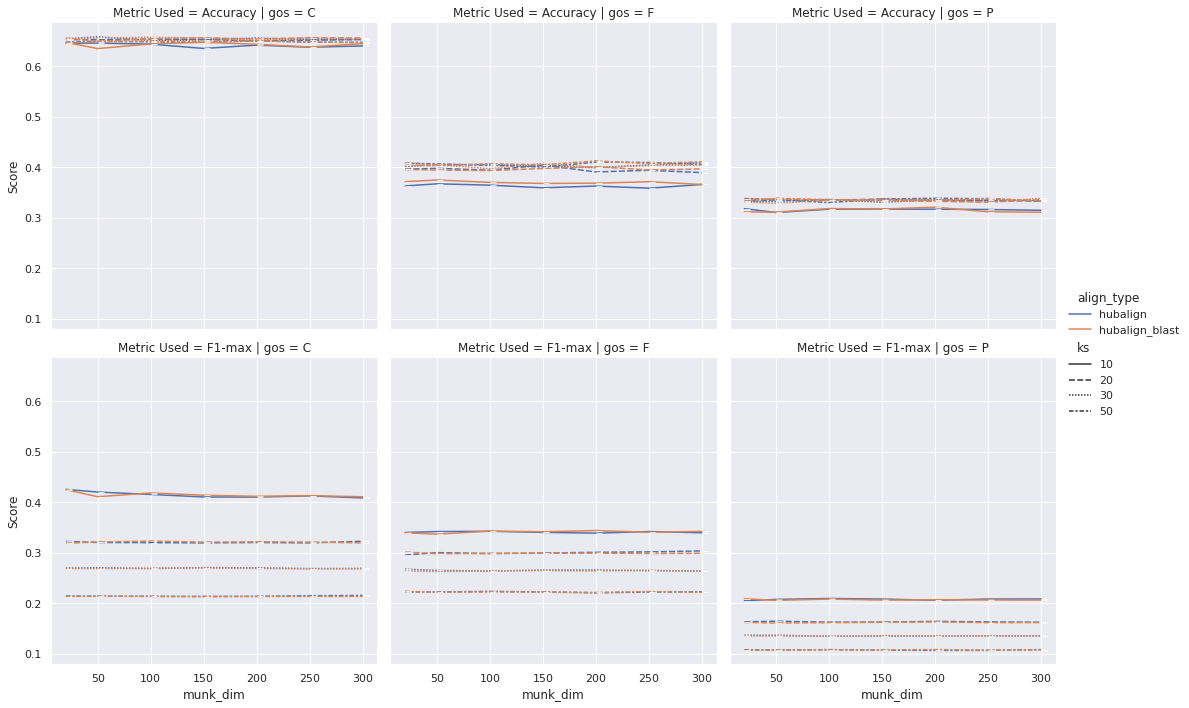

In [109]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_c, x= "munk_dim", y="Score", col="gos", row="Metric Used",
                style = "ks", hue="align_type", kind = "line", marker = True)

      
p.savefig("outputs/figs/human_bakers_variation-landmarks.png")

[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

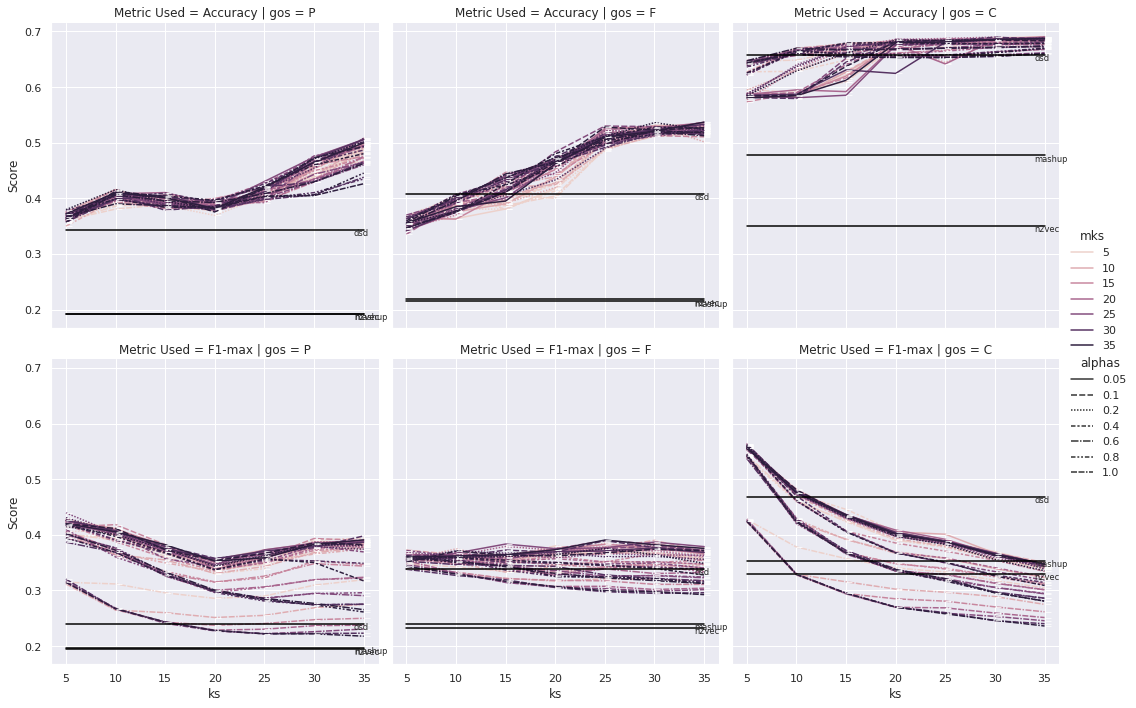

In [24]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_bf, x= "ks", y="Score", col="gos", row="Metric Used",
                style = "alphas", hue = "mks", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(ks, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xycoords = "data", xy=(5, n2vec), xytext=(34,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xycoords = "data", xy=(5, dsd), xytext=(34,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xycoords = "data", xy=(5, mashup), xytext=(34,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo_v_1/bakers_yeast_biogrid-fission_yeast_biogrid/fission_vs_ks.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""

[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

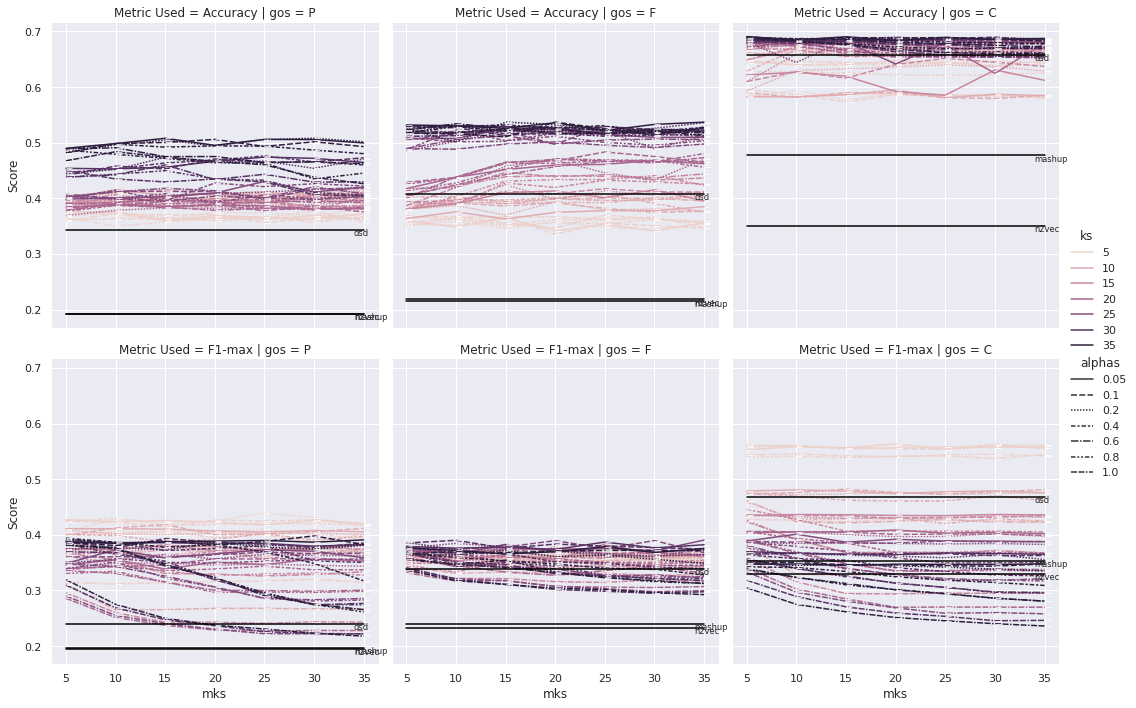

In [25]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_bf, x= "mks", y="Score", col="gos", row="Metric Used",
                style = "alphas", hue = "ks", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(ks, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xycoords = "data", xy=(5, n2vec), xytext=(34,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xycoords = "data", xy=(5, dsd), xytext=(34,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xycoords = "data", xy=(5, mashup), xytext=(34,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo_v_1/bakers_yeast_biogrid-fission_yeast_biogrid/fission_vs_mks.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""